### IS727272 - Cordero Hernández, Marco Ricardo

# Exercise 4.1.2 Incidence AIDS cases, polynomial regression

This dataset is formed by one feature (time), and one output (number of cases). We are going to use this data to show how to use a polynomial regression.

The steps to follow are:
1. Read the data and save the input in 'x' array and the output in 'y' array.
2. Plot 'x' vs 'y' to observe the output behavior
3. Obtain the linear model calculating W0 and w1 coefficients, the cost parameter, and plot the output obtained (yt) vs the output (y).
4. Add a second order feature ($x^2$), obtain the X matrix adding the 'Bias' feature (ones column), and calculate the vector W using the closed-form solution.
5. Calculate the cost function and plot the estimation.

In [5]:
# 1. Read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import pinv
import math

aidset = pd.read_csv('./Datasets/AIDScases.csv')
aidset

,Time,Cases
0,1,185
1,2,200
2,3,293
3,4,374
4,5,554
5,6,713
6,7,763
7,8,857
8,9,1147
9,10,1369


In [6]:
# Convert to numpy arrays
x = np.array(aidset['Time'])
y = np.array(aidset['Cases'])

print(np.shape(x), np.shape(y))

(25,) (25,)


Text(0, 0.5, 'No. of Incidences')

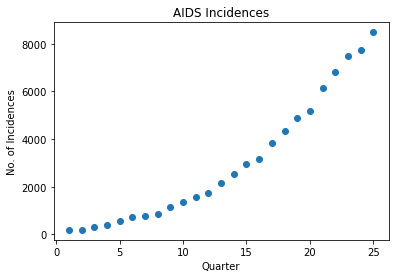

In [7]:
# 2. Plot data
# plt.scatter(aidset['Time'], aidset['Cases'])
# plt.show()

plt.plot(x, y, 'o')
plt.title('AIDS Incidences')
plt.xlabel('Quarter')
plt.ylabel('No. of Incidences')

In [8]:
# Cost function
def costFunc(y, yt):
    r = y - yt
    cost = np.dot(r, r) / len(y)
    
    return cost

Cost: 541734.0413230766


Text(0.5, 1.0, 'Linear Model, cost = 541734.0413230766')

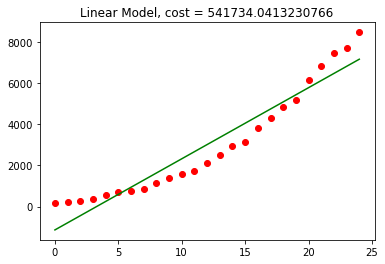

In [9]:
# 3. Obtain a w0 and w1 for a linear regression and calculate yt = w0 + w1*x
xp = np.average(x) # average x
yp = np.average(y) # average y

w1 = (np.average(x * y) - np.average(xp) * np.average(yp)) / (np.average(x * x) - np.average(xp) * np.average(xp))
w0 = yp - (w1 * xp)

yt = w0 + w1 * x # Prediction

# Cost calculation
cost = costFunc(y, yt)
print(f'Cost: {cost}')

# Graph
plt.plot(y, 'or', yt, 'g')
plt.title(f'Linear Model, cost = {cost}')

### Polynomial function
We can add more powers to X to get a polynomial function: $$f(X,W) = \sum_{k=0}^{K}w_k x^k$$

In [10]:
#4. Polynomial features
def bias(xf):
    xf = np.array(xf).T
    n, m = np.shape(xf)
    ones = np.ones((n, 1))
    X = np.concatenate((ones, xf), axis = 1)
    
    return X

features = [x, x * x]
x = bias(features)
print(np.shape(x))
print(x)

(25, 3)
[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]
 [  1.  11. 121.]
 [  1.  12. 144.]
 [  1.  13. 169.]
 [  1.  14. 196.]
 [  1.  15. 225.]
 [  1.  16. 256.]
 [  1.  17. 289.]
 [  1.  18. 324.]
 [  1.  19. 361.]
 [  1.  20. 400.]
 [  1.  21. 441.]
 [  1.  22. 484.]
 [  1.  23. 529.]
 [  1.  24. 576.]
 [  1.  25. 625.]]


In [11]:
#Calculate W Closed-form solution

def closedForm(X, y):
    X2 = np.dot(X.T, X)
    XY = np.dot(X.T, y)
    Xinv = np.linalg.pinv(X2)
    
    W = np.dot(Xinv, XY)
    
    return W

W = closedForm(x, y)
print(W)
print(np.shape(W))

[343.59130435 -60.13798216  15.62770346]
(3,)


In [8]:
#Prediction
yt = np.dot(W, x.T)
print(yt)

[ 299.08102564  285.82615385  303.82668896  353.08263099  433.59397993
  545.36073579  688.38289855  862.66046823 1068.19344482 1304.98182832
 1573.02561873 1872.32481605 2202.87942029 2564.68943144 2957.7548495
 3382.07567447 3837.65190635 4324.48354515 4842.57059086 5391.91304348
 5972.51090301 6584.36416945 7227.47284281 7901.83692308 8607.45641026]


Text(0.5, 1.0, 'Quadratic Model, cost = 15966.213088963223')

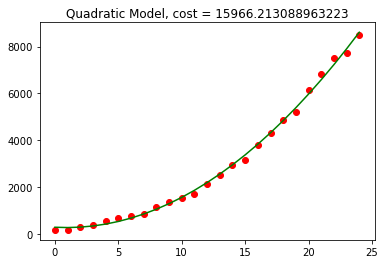

In [9]:
#Cubic model || Graph
plt.plot(y, 'or', yt, 'g')
cost = costFunc(y, yt)
plt.title(f'Quadratic Model, cost = {cost}')

### Non-polynomial function

The linear regression is not restricted to polynomial functions:


$$f(X,W) = w_0 + w_1 x + w_2 x^2 + w_3 sin\left(\frac{x-a}{b}\right)$$

(25, 4)
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 -4.98319802e-01]
 [ 1.00000000e+00  2.00000000e+00  4.00000000e+00 -6.84718859e-01]
 [ 1.00000000e+00  3.00000000e+00  9.00000000e+00 -8.34252668e-01]
 [ 1.00000000e+00  4.00000000e+00  1.60000000e+01 -9.38870333e-01]
 [ 1.00000000e+00  5.00000000e+00  2.50000000e+01 -9.92939240e-01]
 [ 1.00000000e+00  6.00000000e+00  3.60000000e+01 -9.93548322e-01]
 [ 1.00000000e+00  7.00000000e+00  4.90000000e+01 -9.40664784e-01]
 [ 1.00000000e+00  8.00000000e+00  6.40000000e+01 -8.37135876e-01]
 [ 1.00000000e+00  9.00000000e+00  8.10000000e+01 -6.88535592e-01]
 [ 1.00000000e+00  1.00000000e+01  1.00000000e+02 -5.02864568e-01]
 [ 1.00000000e+00  1.10000000e+01  1.21000000e+02 -2.90119326e-01]
 [ 1.00000000e+00  1.20000000e+01  1.44000000e+02 -6.17540667e-02]
 [ 1.00000000e+00  1.30000000e+01  1.69000000e+02  1.69936030e-01]
 [ 1.00000000e+00  1.40000000e+01  1.96000000e+02  3.92476775e-01]
 [ 1.00000000e+00  1.50000000e+01  2.25000000e+02  5.9

Text(0.5, 1.0, 'Non-polynomial Model, cost = 14887.821755223367')

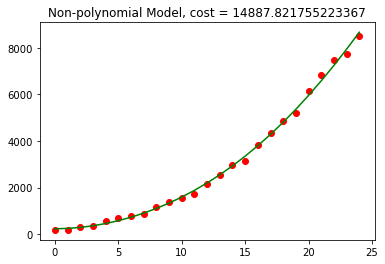

In [10]:
# Non-polynomial function (a = 2660, b = 4.3)
x = np.array(aidset['Time'])
y = np.array(aidset['Cases'])

features = [x, x**2, np.sin((x - 2660)/4.3)]
x = bias(features)
print(np.shape(x))
print(x)

W = closedForm(x, y)
print(W)
print(np.shape(W))

yt = np.dot(W, x.T)
print(yt)

cost = costFunc(y, yt)

# Non-polynomial model || Graph
plt.plot(y, 'or', yt, 'g')
plt.title(f'Non-polynomial Model, cost = {cost}')